In [56]:
import pandas as pd
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from pymorphy3 import MorphAnalyzer
from nltk.corpus import stopwords
import numpy as np
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

In [57]:
stopwords = stopwords.words('russian')

In [58]:
df = pd.read_csv('./data/Petitions.csv')
df

id                               public_petition_text  \
0      3168490                                     снег на дороге   
1      3219678                очистить кабельный киоск от рекламы   
2      2963920  Просим убрать все деревья и кустарники, которы...   
3      3374910  Неудовлетворительное состояние парадной - надп...   
4      3336285                                           Граффити   
...        ...                                                ...   
59884  3128111                           прошу закрасить граффити   
59885  3276713       Прошу вас отремонтировать пешеходную дорожку   
59886  3274663  Необходимо демонтировать незаконную рекламную ...   
59887  3359308  Очень гремит на ветру металлическая часть окна...   
59888  3209098  Две проблемы в одном:\n1) Незаконные надписи/о...   

                                         reason_category  
0                                        Благоустройство  
1                                        Благоустройство  
2                                        Благоустройство  
3                                         Содержание МКД  
4                                        Благоустройство  
...                                                  ...  
59884                                    Благоустройство  
59885                                    Благоустройство  
59886  Незаконная информационная и (или) рекламная ко...  
59887                                             Кровля  
59888                                    Благоустройство  

[59889 rows x 3 columns]

In [59]:
print(len(df['reason_category'].unique()), "\n", df['reason_category'].value_counts())

15 
 reason_category
Благоустройство                                                                     34769
Содержание МКД                                                                      14461
Нарушение правил пользования общим имуществом                                        2170
Незаконная информационная и (или) рекламная конструкция                              1831
Фасад                                                                                1483
Повреждения или неисправность элементов уличной инфраструктуры                       1164
Кровля                                                                                825
Водоснабжение                                                                         809
Состояние рекламных или информационных конструкций                                    673
Санитарное состояние                                                                  434
Центральное отопление                                                          

In [60]:
df.drop(columns="id", inplace=True)

In [61]:
new_df = df.sample(100)
new_df

public_petition_text  \
50594                                       очистите о о   
44586  Поквартирный указатель в неудовлетворительном ...   
32718                                 Сосульки на крыше.   
45549  Вход на пожарную лестницу. 2 этаж. Отсутствует...   
42187  отсутствует ежедневная уборка лифтовых кабин и...   
...                                                  ...   
1871   На проезжей части между д.23 и д.29 по улице Р...   
6908   Не производится уборка коридоров, лифтовых хол...   
41675  Появилась рекламная надпись на стене, закрасьт...   
23748                     На электрощит нанесены надписи   
14051                           Простат проверить роллет   

                                         reason_category  
50594                                    Благоустройство  
44586                                     Содержание МКД  
32718                                             Кровля  
45549                                     Содержание МКД  
42187                                     Содержание МКД  
...                                                  ...  
1871   Повреждения или неисправность элементов улично...  
6908                                      Содержание МКД  
41675                                    Благоустройство  
23748                                    Благоустройство  
14051      Нарушение правил пользования общим имуществом  

[100 rows x 2 columns]

In [62]:
X = new_df["public_petition_text"].to_list()

In [63]:
X

['очистите о о',
 'Поквартирный указатель в неудовлетворительном состоянии.',
 'Сосульки на крыше.',
 'Вход на пожарную лестницу. 2 этаж. Отсутствует чехол на поручне.',
 'отсутствует ежедневная уборка лифтовых кабин и их дезинфекция в период пандемии. неприятный запах, подтёки масла. прошу разобраться и следить.',
 'Нижняя и торцевая поверхности козырька\r\nнад входом в парадную №3\r\nимеют облупившиеся, облезлые и загрязнённые участки.\r\n\r\nПо аналогии с УСПЕШНО отработанными сообщениями:\r\nhttp://gorod.gov.spb.ru/problems/1188300\r\nhttp://gorod.gov.spb.ru/problems/1267839\r\nhttp://gorod.gov.spb.ru/problems/1867052\r\nhttp://gorod.gov.spb.ru/problems/1813220\r\nhttp://gorod.gov.spb.ru/problems/1967137\r\nhttp://gorod.gov.spb.ru/problems/2579908\r\nhttp://gorod.gov.spb.ru/problems/2579596\r\nhttp://gorod.gov.spb.ru/problems/2591538\r\nhttp://gorod.gov.spb.ru/problems/2658731\r\nhttp://gorod.gov.spb.ru/problems/2668051\r\nпрошу привести в надлежащее состояние окраску\r\nконструкти

In [64]:
def remove_html(text): 
    html_tag=re.compile('<.*?>')
    text_no_html = html_tag.sub('', text)
    return text_no_html

In [65]:
def remove_quots(text):
    text_only_letters = re.sub('[^\w\s]', '', text)
    return text_only_letters


In [66]:
def tokenize(text):
    words = word_tokenize(text)
    return words


In [67]:
def morph(text):
    morph = MorphAnalyzer()
    lemmas = [morph.normal_forms(w)[0] for w in text]
    return lemmas

In [68]:
def del_sw(text):
    prepared = [w for w in text if w not in stopwords]
    lemm_sentce = ' '.join(prepared)
    return lemm_sentce

In [69]:
# def preprocessing_text(text):
#     lst = []
#     #remove html
#     for i in text:
#         html_tag=re.compile('<.*?>')
#         text_no_html = html_tag.sub('', i)
#         #remove quots
#         text_only_letters = re.sub('[^\w\s]', '', text_no_html)
#         #tokenizим
#         words = word_tokenize(text_only_letters)
#         #morphим
#         morph = MorphAnalyzer()
#         lemmas = [morph.normal_forms(w)[0] for w in words]
#         #del_sw
#         prepared = [w for w in lemmas if w not in stopwords]
#         lemm_sentce = ' '.join(prepared)
#         lst.append(lemm_sentce)
#         # lst.append(prepared)
#     return lst


In [70]:
general_mass = {
    "rem_html" : remove_html,
    "rem_quots" : remove_quots,
    "tokenize" : tokenize,
    "morph" : morph,
    "del_sw" : del_sw
}

In [71]:
list_m = ["rem_html", "rem_quots", "tokenize", "morph", "del_sw"]

In [72]:
def prepro(list_m, text):
    for i in list_m:
        text = [general_mass[i](j) for j in text]
    return text

In [73]:
prepro_text = prepro(list_m=list_m, text=X)

In [74]:
prepro_text

['очистить',
 'поквартирный указатель неудовлетворительный состояние',
 'сосулька крыша',
 'вход пожарный лестница 2 этаж отсутствовать чехол поручень',
 'отсутствовать ежедневный уборка лифтовый кабина дезинфекция период пандемия неприятный запах подтёк масло просить разобраться следить',
 'нижний торцевой поверхность козырёк вход парадный 3 иметь облупиться облезлый загрязнить участок аналогия успешно отработать сообщение httpgorodgovspbruproblems1188300 httpgorodgovspbruproblems1267839 httpgorodgovspbruproblems1867052 httpgorodgovspbruproblems1813220 httpgorodgovspbruproblems1967137 httpgorodgovspbruproblems2579908 httpgorodgovspbruproblems2579596 httpgorodgovspbruproblems2591538 httpgorodgovspbruproblems2658731 httpgorodgovspbruproblems2668051 просить привести надлежащий состояние окраска конструктивный элемент фасад козырёк',
 'мешать парковка припарковаться прокалывать колесо',
 'конструкция запрещать парковка стоять',
 'крыша течь несколько год никто заниматься проблема писать э

In [75]:
def del_word_len_one(list_w):
    w_del = []
    for i in range(0, len(list_w)):
        if len(list_w[i].split()) < 3:
            w_del.append(i)
    for index in sorted(w_del, reverse=True):
        del list_w[index]
        
    return list_w

In [76]:
new_prepro_text = del_word_len_one(prepro_text)
new_prepro_text

['поквартирный указатель неудовлетворительный состояние',
 'вход пожарный лестница 2 этаж отсутствовать чехол поручень',
 'отсутствовать ежедневный уборка лифтовый кабина дезинфекция период пандемия неприятный запах подтёк масло просить разобраться следить',
 'нижний торцевой поверхность козырёк вход парадный 3 иметь облупиться облезлый загрязнить участок аналогия успешно отработать сообщение httpgorodgovspbruproblems1188300 httpgorodgovspbruproblems1267839 httpgorodgovspbruproblems1867052 httpgorodgovspbruproblems1813220 httpgorodgovspbruproblems1967137 httpgorodgovspbruproblems2579908 httpgorodgovspbruproblems2579596 httpgorodgovspbruproblems2591538 httpgorodgovspbruproblems2658731 httpgorodgovspbruproblems2668051 просить привести надлежащий состояние окраска конструктивный элемент фасад козырёк',
 'мешать парковка припарковаться прокалывать колесо',
 'конструкция запрещать парковка стоять',
 'крыша течь несколько год никто заниматься проблема писать это май ноябрь описываться пятно 

In [77]:
count_vocab = set((' '.join(new_prepro_text).split()))
word_to_ix = {word: i for i, word in enumerate(count_vocab)}
word_to_ix

{'место': 0,
 'автомобиль': 1,
 'требование': 2,
 'газон': 3,
 'делать': 4,
 'завалить': 5,
 'качественный': 6,
 'поле': 7,
 'полный': 8,
 'оплата': 9,
 'подвал': 10,
 'ограждать': 11,
 'д29': 12,
 'связываться': 13,
 'направить': 14,
 '59991477': 15,
 '3': 16,
 'текущий': 17,
 'обесточивать': 18,
 'покрыть': 19,
 'пожарный': 20,
 'труд': 21,
 'решётка': 22,
 'именно': 23,
 'размер': 24,
 'засыпать': 25,
 'сломать': 26,
 'пнедробление': 27,
 'след': 28,
 '814': 29,
 'решение': 30,
 'чёрный': 31,
 'интересный': 32,
 'окраска': 33,
 'поручень': 34,
 'httpgorodgovspbruproblems2591538': 35,
 'графически': 36,
 'httpgorodgovspbruproblems2012786': 37,
 'арочный': 38,
 'плафон': 39,
 'открыть': 40,
 'песок': 41,
 'вдоль': 42,
 'похоже': 43,
 'вывозить': 44,
 'недавний': 45,
 'графика': 46,
 'множество': 47,
 'httpgorodgovspbruproblems2579908': 48,
 'болт': 49,
 'спб': 50,
 'день': 51,
 'демонтировать': 52,
 'пройти': 53,
 'арка': 54,
 'выбоина': 55,
 'объём': 56,
 'расположение': 57,
 'фонарь

In [78]:
def get_context_words(data, m):
    central_words = []
    context_words = []
    s = []
    for k in range(0, len(data)):
        for i in range(m, (len(data[k].split()) - (m * 2)) + (m)):
            central_word = data[k].split()[i]
            central_words.append(word_to_ix[central_word])

            context_word = []
            for j in range(i - m, i + m + 1):
                if j != i:
                    context_word.append(word_to_ix[data[k].split()[j]])
            context_words.append(context_word)

    s = list(zip(central_words, context_words))

    return s

In [79]:
s = get_context_words(new_prepro_text, m=1)

In [80]:
s

[(471, [547, 127]),
 (127, [471, 176]),
 (20, [324, 554]),
 (554, [20, 573]),
 (573, [554, 373]),
 (373, [573, 263]),
 (263, [373, 434]),
 (434, [263, 34]),
 (166, [263, 365]),
 (365, [166, 376]),
 (376, [365, 220]),
 (220, [376, 136]),
 (136, [220, 266]),
 (266, [136, 327]),
 (327, [266, 274]),
 (274, [327, 260]),
 (260, [274, 499]),
 (499, [260, 350]),
 (350, [499, 301]),
 (301, [350, 181]),
 (181, [301, 576]),
 (516, [431, 426]),
 (426, [516, 250]),
 (250, [426, 324]),
 (324, [250, 221]),
 (221, [324, 16]),
 (16, [221, 362]),
 (362, [16, 343]),
 (343, [362, 501]),
 (501, [343, 225]),
 (225, [501, 306]),
 (306, [225, 451]),
 (451, [306, 331]),
 (331, [451, 187]),
 (187, [331, 110]),
 (110, [187, 79]),
 (79, [110, 101]),
 (101, [79, 484]),
 (484, [101, 456]),
 (456, [484, 84]),
 (84, [456, 48]),
 (48, [84, 527]),
 (527, [48, 35]),
 (35, [527, 483]),
 (483, [35, 256]),
 (256, [483, 301]),
 (301, [256, 380]),
 (380, [301, 69]),
 (69, [380, 176]),
 (176, [69, 33]),
 (33, [176, 212]),
 (2

In [81]:
word_list = list(word_to_ix.keys())
word_list

['место',
 'автомобиль',
 'требование',
 'газон',
 'делать',
 'завалить',
 'качественный',
 'поле',
 'полный',
 'оплата',
 'подвал',
 'ограждать',
 'д29',
 'связываться',
 'направить',
 '59991477',
 '3',
 'текущий',
 'обесточивать',
 'покрыть',
 'пожарный',
 'труд',
 'решётка',
 'именно',
 'размер',
 'засыпать',
 'сломать',
 'пнедробление',
 'след',
 '814',
 'решение',
 'чёрный',
 'интересный',
 'окраска',
 'поручень',
 'httpgorodgovspbruproblems2591538',
 'графически',
 'httpgorodgovspbruproblems2012786',
 'арочный',
 'плафон',
 'открыть',
 'песок',
 'вдоль',
 'похоже',
 'вывозить',
 'недавний',
 'графика',
 'множество',
 'httpgorodgovspbruproblems2579908',
 'болт',
 'спб',
 'день',
 'демонтировать',
 'пройти',
 'арка',
 'выбоина',
 'объём',
 'расположение',
 'фонарь',
 'поребрик',
 'дождь',
 'зона',
 'закрываться',
 'проверить',
 'вокруг',
 'огромный',
 'писать',
 'постепенно',
 '73',
 'надлежащий',
 'включать',
 'простата',
 'д19',
 'очистка',
 'видеть',
 'бумажный',
 'забор',
 '10'

In [82]:
with open('word_list3.tsv', 'w', encoding='utf-8') as f:
    f.write('\n'.join(word_list))

In [83]:
def embedding_matrix(f):
    count_vocab = set((' '.join(f).split()))
    print(len(count_vocab))
    word_to_ix = {word: i for i, word in enumerate(count_vocab)}
    print(word_to_ix)
    a = max(word_to_ix.values()) + 1
    print(a)
    matrica = [[0] * a for _ in range(a)]
    for k in range(0, len(f)):
        b = len(f[k].split())
        words = f[k].split()
        for i in range(b):
            for j in range(i+1, b):
                if words[i] in f[k] and words[j] in f[k]:
                    matrica[word_to_ix[words[i]]][word_to_ix[words[j]]] += 1
                    matrica[word_to_ix[words[j]]][word_to_ix[words[i]]] += 1

    for row in matrica:
        print(row)
    
    return matrica

In [84]:
emb_matr = embedding_matrix(new_prepro_text)
emb_matr

586
{'место': 0, 'автомобиль': 1, 'требование': 2, 'газон': 3, 'делать': 4, 'завалить': 5, 'качественный': 6, 'поле': 7, 'полный': 8, 'оплата': 9, 'подвал': 10, 'ограждать': 11, 'д29': 12, 'связываться': 13, 'направить': 14, '59991477': 15, '3': 16, 'текущий': 17, 'обесточивать': 18, 'покрыть': 19, 'пожарный': 20, 'труд': 21, 'решётка': 22, 'именно': 23, 'размер': 24, 'засыпать': 25, 'сломать': 26, 'пнедробление': 27, 'след': 28, '814': 29, 'решение': 30, 'чёрный': 31, 'интересный': 32, 'окраска': 33, 'поручень': 34, 'httpgorodgovspbruproblems2591538': 35, 'графически': 36, 'httpgorodgovspbruproblems2012786': 37, 'арочный': 38, 'плафон': 39, 'открыть': 40, 'песок': 41, 'вдоль': 42, 'похоже': 43, 'вывозить': 44, 'недавний': 45, 'графика': 46, 'множество': 47, 'httpgorodgovspbruproblems2579908': 48, 'болт': 49, 'спб': 50, 'день': 51, 'демонтировать': 52, 'пройти': 53, 'арка': 54, 'выбоина': 55, 'объём': 56, 'расположение': 57, 'фонарь': 58, 'поребрик': 59, 'дождь': 60, 'зона': 61, 'закры

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,


In [85]:
from sklearn.decomposition import PCA

In [86]:
pca = PCA(n_components=30)
pca.fit(emb_matr)
data_pca = pca.transform(emb_matr)

In [87]:
np.savetxt('embeddings.tsv', data_pca, delimiter='\t')

## Neural_buri

In [88]:
# [(256, [23, 45])
# (256, [23, 45])
# (256, [23, 45])]
X_i = np.array([])
y_i = np.array([])
for i, j in s:
    y_i = np.insert(y_i, 0, i)
    X_i = np.insert(X_i, 0, j).reshape(-1, 2)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((657, 2), (116, 2), (657,), (116,))

In [100]:
batch_size = 256
train_ds = TensorDataset(torch.from_numpy(X_train).type(torch.long), torch.from_numpy(y_train).type(torch.long))
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [101]:
len(next(iter(train_dl)))

2

In [91]:
train_dl.batch_size

256

In [92]:
class CBOWModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOWModeler, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Embedding(vocab_size, embedding_dim),
            nn.Linear(embedding_dim, 250),
            nn.Tanh(),
            nn.Linear(250, vocab_size),
            nn.LogSoftmax(dim=1)
        )
    def forward(self, x):
        y = self.linear_relu_stack(x)
        print(y.shape, "before_OUT")
        return torch.argmax(y, dim=0)
    

In [93]:
loss_function = nn.NLLLoss()

In [94]:
model = CBOWModeler(len(count_vocab), 10)
model

CBOWModeler(
  (linear_relu_stack): Sequential(
    (0): Embedding(586, 10)
    (1): Linear(in_features=10, out_features=250, bias=True)
    (2): Tanh()
    (3): Linear(in_features=250, out_features=586, bias=True)
    (4): LogSoftmax(dim=1)
  )
)

In [95]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [96]:
wordvecs = model.linear_relu_stack[3].weight.cpu().detach().numpy()
wordvecs

array([[-0.05961888, -0.01618008,  0.02805746, ..., -0.00503685,
         0.02660941, -0.04272775],
       [ 0.03849578,  0.01983348,  0.05895896, ...,  0.00831674,
         0.06000508,  0.04199173],
       [ 0.04401001, -0.02637179, -0.02483086, ...,  0.02083012,
         0.06131354, -0.00628158],
       ...,
       [-0.04735471, -0.00047665,  0.04252464, ..., -0.03053521,
        -0.02233917,  0.01321367],
       [-0.0103475 ,  0.00951227,  0.05839441, ..., -0.03653938,
         0.03152184,  0.05527014],
       [-0.05209616, -0.01711542, -0.01459163, ...,  0.02822925,
         0.00584916, -0.01504284]], dtype=float32)

In [97]:
np.savetxt('word2vec_vectors.tsv', wordvecs, delimiter='\t')

In [98]:
len(next(iter(train_dl)))

2

In [99]:
f = model(next(iter(train_dl)))

TypeError: embedding(): argument 'indices' (position 2) must be Tensor, not list

In [ ]:
epochs = 40

loss_values = []
for epoch in range(epochs):
    for x_b, y_b in train_dl:
        print(x_b.shape)
        outputs = model(x_b)
        print(outputs.shape, y_b.shape)
        loss_value = loss_function(outputs, y_b)

        loss_value.backward()

        optimizer.step()

        optimizer.zero_grad()
    loss_values.append(loss_value.item())

    print(f'Эпоха {epoch + 1}, Значение функции потерь: {loss_value.item()}')

torch.Size([256, 2])


torch.Size([256, 2, 662]) before_OUT
torch.Size([2, 662]) torch.Size([256])


ValueError: Expected input batch_size (2) to match target batch_size (256).

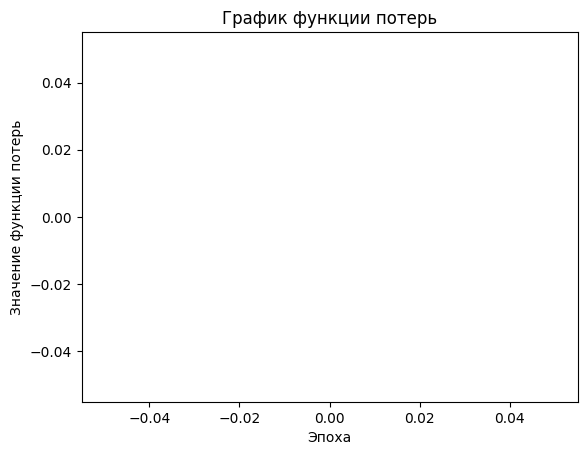

In [ ]:
plt.plot(loss_values)
plt.xlabel('Эпоха')
plt.ylabel('Значение функции потерь')
plt.title('График функции потерь')
plt.show()